In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/adult.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Exploration Data**

In [ ]:
df.education.value_counts()
#di sort tidak berdasarkan degree education tapi berdasarkan frekuensi data

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [ ]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis = 1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis = 1)
df = df.drop('education', axis =1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis = 1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis = 1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis = 1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country')], axis = 1)

In [ ]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [ ]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

In [ ]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


<Axes: >

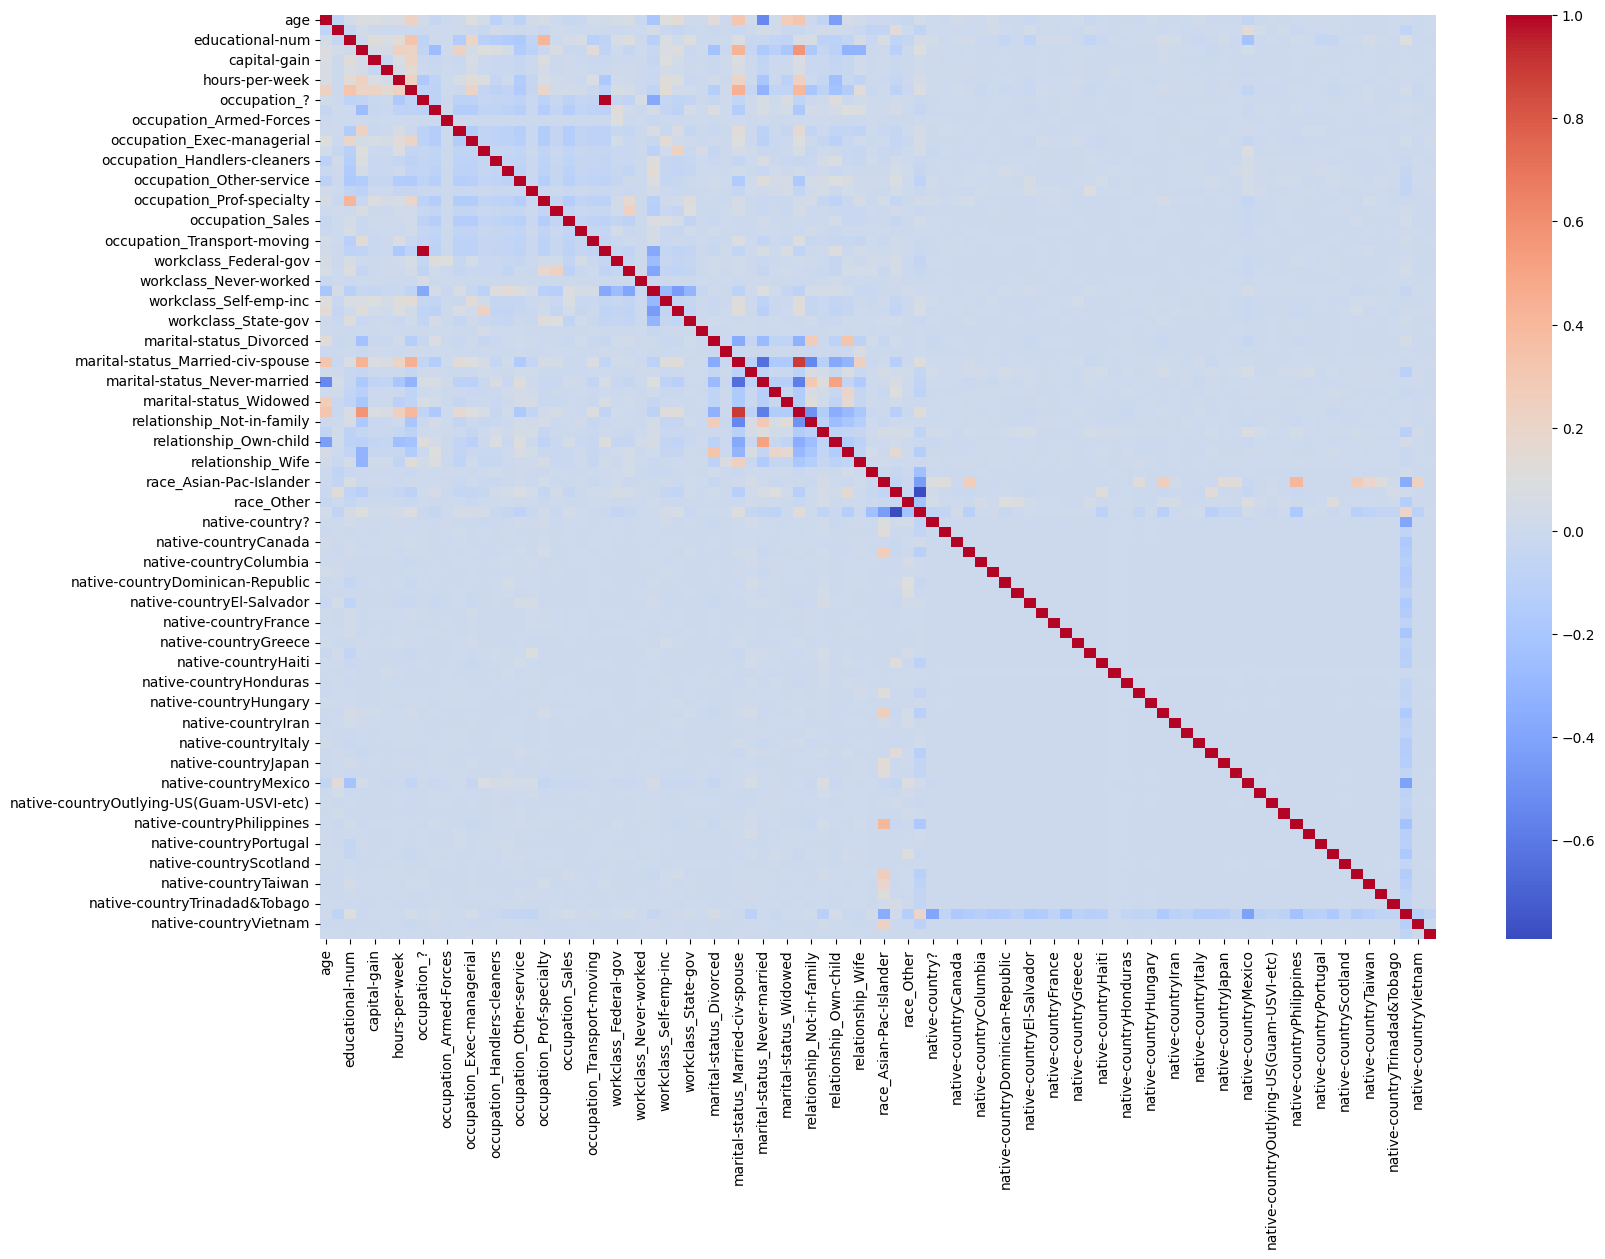

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot = False, cmap ='coolwarm')


In [ ]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-countryThailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-countryTrinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-countryUnited-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-countryVietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [ ]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len (df.columns))
cols_to_drop = sorted_correlations.iloc [:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis = 1)

In [ ]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


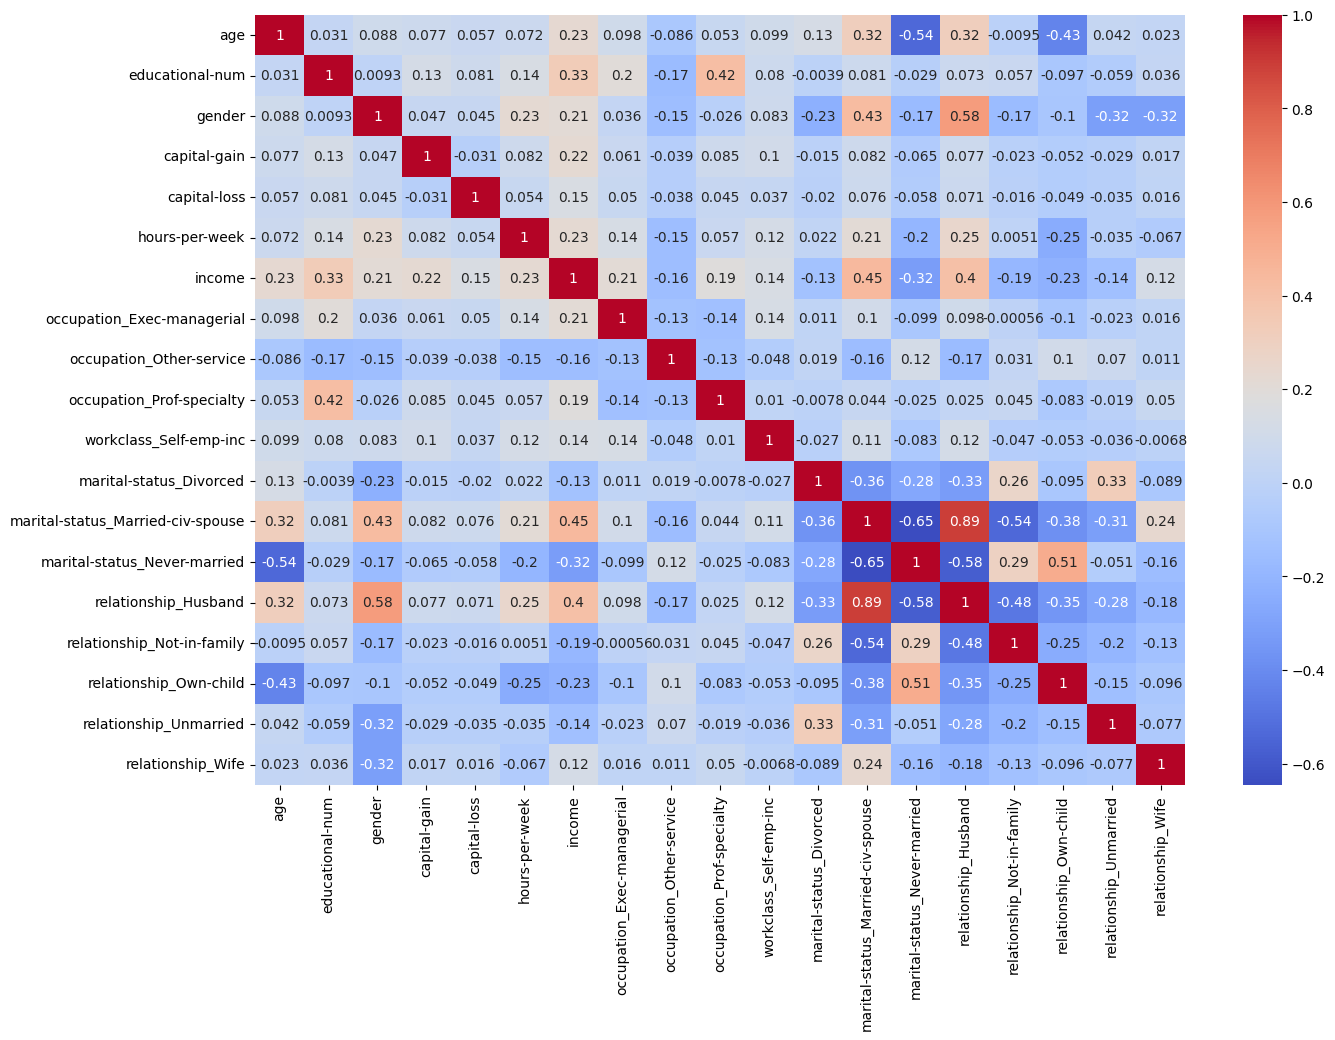

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df_dropped.corr(), annot = True, cmap ='coolwarm')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size = 0.2)
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
43650,28,3,1,0,0,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34064,24,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31178,41,10,1,0,0,48,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35696,25,10,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
40756,41,9,0,0,0,28,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21874,29,14,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13100,30,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
47422,53,2,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38863,17,7,0,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-countryPortugal,native-countryPuerto-Rico,native-countryScotland,native-countrySouth,native-countryTaiwan,native-countryThailand,native-countryTrinadad&Tobago,native-countryUnited-States,native-countryVietnam,native-countryYugoslavia
25215,24,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45997,47,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30280,37,7,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10345,59,15,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23505,32,11,1,0,0,46,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48190,27,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2380,25,12,0,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15522,37,12,1,0,1485,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5282,45,14,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
train_X = train_df.drop('income', axis=1)
train_Y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_Y = test_df['income']


In [ ]:
forest = RandomForestClassifier(
)
forest.fit(train_X, train_Y)

RandomForestClassifier()

In [ ]:
forest.score(test_X, test_Y)

0.8488074521445389

In [ ]:
forest.feature_importances_

array([2.27446873e-01, 1.24608706e-01, 1.34173214e-02, 1.12469498e-01,
       3.73993049e-02, 1.13983774e-01, 1.68134483e-03, 5.09815324e-03,
       5.73041550e-05, 6.44407314e-03, 2.13091869e-02, 4.36454873e-03,
       3.63133797e-03, 4.32027939e-03, 8.43900255e-03, 2.04475799e-04,
       1.87311154e-02, 2.81316938e-03, 6.10871808e-03, 4.34667009e-03,
       4.19707684e-03, 1.93081490e-03, 5.09476639e-03, 5.38627556e-03,
       1.83481197e-06, 8.87921409e-03, 6.57108354e-03, 8.11421216e-03,
       4.31037383e-03, 1.76001231e-04, 6.82727810e-03, 3.32187146e-04,
       6.46402012e-02, 9.22106945e-04, 2.69658635e-02, 1.92920695e-03,
       1.80322388e-03, 5.47074878e-02, 1.23414153e-02, 1.41925984e-03,
       6.73684375e-03, 6.61311627e-03, 8.45756549e-03, 1.39137537e-03,
       2.91189354e-03, 4.85471443e-03, 9.46353302e-04, 6.24033289e-03,
       2.94289215e-03, 2.72413573e-04, 1.50794791e-03, 5.84024165e-04,
       3.65516323e-04, 8.51788230e-04, 2.42693102e-04, 1.87402933e-04,
      

In [ ]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key = lambda x: x[1], reverse = True)}

In [ ]:
importances

{'age': 0.22744687327334423,
 'educational-num': 0.12460870575708878,
 'hours-per-week': 0.11398377393559617,
 'capital-gain': 0.11246949825381264,
 'marital-status_Married-civ-spouse': 0.0646402012136654,
 'relationship_Husband': 0.05470748780564647,
 'capital-loss': 0.03739930487055124,
 'marital-status_Never-married': 0.026965863466202267,
 'occupation_Exec-managerial': 0.021309186929529725,
 'occupation_Prof-specialty': 0.018731115380358827,
 'gender': 0.013417321361922812,
 'relationship_Not-in-family': 0.0123414152745657,
 'workclass_Private': 0.008879214086013103,
 'relationship_Wife': 0.008457565494339353,
 'occupation_Other-service': 0.008439002545653504,
 'workclass_Self-emp-not-inc': 0.008114212155482975,
 'marital-status_Divorced': 0.0068272780985617785,
 'relationship_Own-child': 0.006736843752279998,
 'relationship_Unmarried': 0.006613116268494629,
 'workclass_Self-emp-inc': 0.006571083536351254,
 'occupation_Craft-repair': 0.006444073138107416,
 'native-countryUnited-Sta

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [50, 100,250],
    'max_depth' : [5,10,30,None],
    'min_samples_split' : [2,4],
    'max_features' : ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                          param_grid=param_grid, verbose=10 )

In [ ]:
grid_search.fit(train_X, train_Y)

[CV 2/5; 27/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.852 total time=  12.6s
[CV 3/5; 27/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 3/5; 27/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.873 total time=  13.5s
[CV 4/5; 27/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 4/5; 27/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.859 total time=  12.2s
[CV 5/5; 27/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250
[CV 5/5; 27/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.857 total time=  12.3s
[CV 1/5; 28/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=50
[CV 1/5; 28/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.855 total time=   3.5s
[CV 2/5; 2

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4)

In [ ]:
forest = grid_search.best_estimator_

In [ ]:
forest.score(test_X, test_Y)

0.8626266762206981

In [ ]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key = lambda x: x[1], reverse = True)}

In [ ]:
importances

{'age': 0.14686723245899427,
 'capital-gain': 0.13886965096190895,
 'educational-num': 0.13021133941778457,
 'hours-per-week': 0.09106676549063654,
 'marital-status_Married-civ-spouse': 0.08358617749274784,
 'relationship_Husband': 0.06327015485879166,
 'capital-loss': 0.04454005240405625,
 'marital-status_Never-married': 0.04151946581743351,
 'occupation_Exec-managerial': 0.024582909923243804,
 'occupation_Prof-specialty': 0.02240603215516341,
 'gender': 0.016026684885639058,
 'relationship_Not-in-family': 0.013186682865524503,
 'relationship_Own-child': 0.011581033447181609,
 'relationship_Wife': 0.011086037973633842,
 'marital-status_Divorced': 0.0098416724193809,
 'workclass_Private': 0.008625303562713724,
 'occupation_Other-service': 0.008535935717865524,
 'workclass_Self-emp-not-inc': 0.008512171831735428,
 'workclass_Self-emp-inc': 0.007380162019227025,
 'relationship_Unmarried': 0.006496619435091773,
 'native-countryUnited-States': 0.006224574054294951,
 'workclass_Federal-gov'